# exp1

In [1]:
%%bash
./sys-info.sh

MEM_TOTAL = 15851 mB
SWAP_TOTAL = 0 mB
PAGE_SIZE = 4096 B
MEM_AVAILABLE = 5480 mB
SWAP_FREE = 0 mB


## mem

In [2]:
from matplotlib import pyplot as plt

def plot(free_used_buff_cache):
    free = []
    used = []
    buff_cache = []
    with open(free_used_buff_cache,'r') as f:
        stripped = list(map(str.strip, f.read().split("\n")[:-1]))
        for line in stripped:
            free_var, used_var, buff_cache_var = map(float, line.split())
            free.append(free_var)
            used.append(used_var)
            buff_cache.append(buff_cache_var)
    
    timeline = range(1, len(free) + 1)

    plt.figure(figsize=(15, 7))    
    plt.plot(timeline, free, 'red', label='free')
    plt.plot(timeline, used, 'blue', label='used')
    plt.plot(timeline, buff_cache, 'green', label='buff_cache')
    plt.xlabel("seconds")
    plt.ylabel("mBs")
    plt.legend()
    

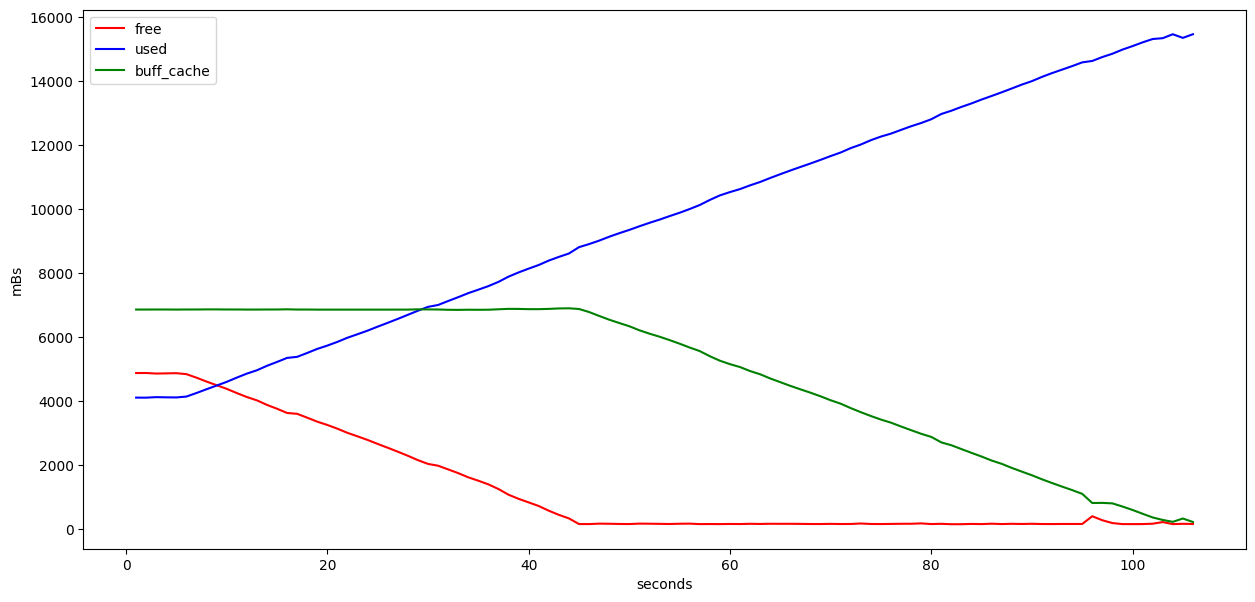

In [3]:
plot("/home/peter/lab5/exp1/1/free_used_buff_cache.log")

### dmesg
```
[48193.158833] [ 105479]  1000 105479  2984358  2982601 23957504        0           200 mem.sh
[48193.158867] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=docker.service,mems_allowed=0,global_oom,task_memcg=/user.slice/user-1000.slice/user@1000.service/app.slice/app-org.kde.konsole-78f64ab349ca47969650461666ea7fa6.scope,task=mem.sh,pid=105479,uid=1000
[48193.158882] Out of memory: Killed process 105479 (mem.sh) total-vm:11937432kB, anon-rss:11930404kB, file-rss:0kB, shmem-rss:0kB, UID:1000 pgtables:23396kB oom_score_adj:200
```

In [4]:
%%bash
cat /home/peter/lab5/exp1/1/report.log | tail -1

152000000


In [5]:
11937432 * 1024 / 152000000 # kB * 1024 = B

80.4205945263158

## mem2


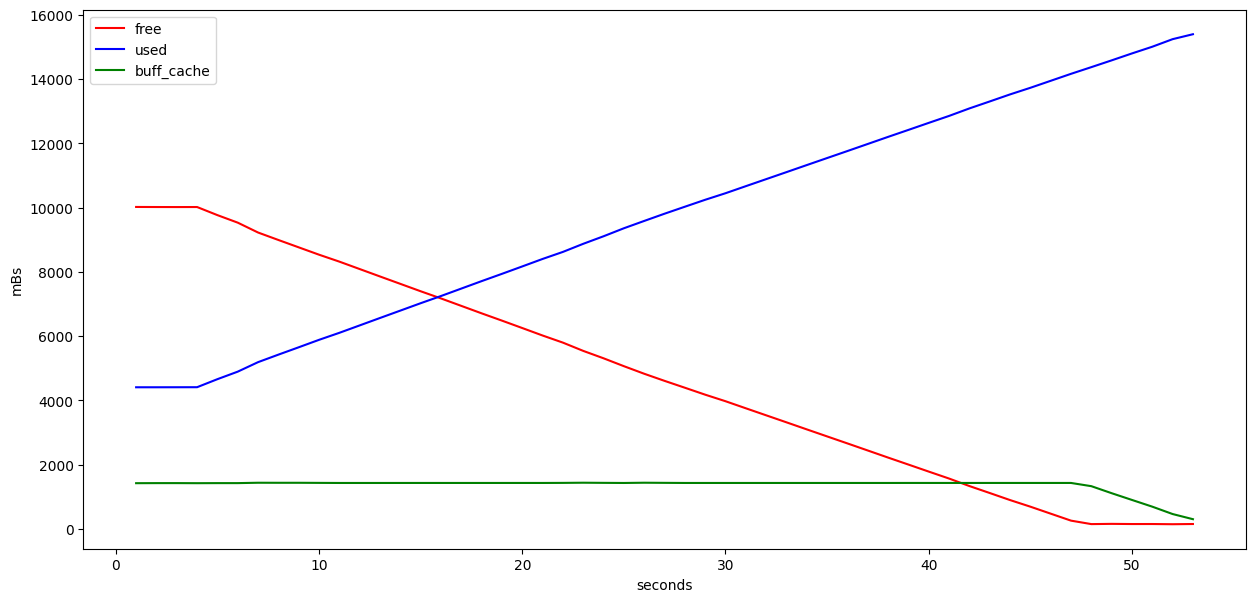

In [6]:
plot("/home/peter/lab5/exp1/2/free_used_buff_cache.log")

In [7]:
%%bash
cat /home/peter/lab5/exp1/2/report.log | tail -1
cat /home/peter/lab5/exp1/2/report2.log | tail -1

71000000
73000000


### dmesg
```
[49251.924939] [ 110034]  1000 110034  1389006  1387278 11169792        0           200 mem.sh
[49251.924941] [ 110035]  1000 110035  1435470  1433756 11550720        0           200 mem2.sh
[49251.924962] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=user.slice,mems_allowed=0,global_oom,task_memcg=/user.slice/user-1000.slice/user@1000.service/background.slice/plasma-krunner.service,task=mem2.sh,pid=110035,uid=1000
[49251.924980] Out of memory: Killed process 110035 (mem2.sh) total-vm:5741880kB, anon-rss:5735024kB, file-rss:0kB, shmem-rss:0kB, UID:1000 pgtables:11280kB oom_score_adj:200
```

# exp2

#### N = 15200000
#### N * 10 = 152000000 - предельное значение из 1 эксперимента
#### N * 30 >> 152000000 => crash
#### new_N = (N / 3)
#### new_N * 30 = 152000000 => OK